# Proyecto Modulo 2 (venta de productos alimenticios)

**Objetivo** 
Investigar el comportamiento del usuario para la aplicación de la empresa.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
logs=pd.read_csv("/datasets/logs_exp_us.csv",sep='\t')

### Preparar los datos para el análisis

In [3]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [4]:
logs.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [5]:
# Pasar nombres de las columnas a minusculas
logs.columns = logs.columns.str.lower()
logs

,eventname,deviceidhash,eventtimestamp,expid
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [6]:
# datos ausentes
logs.isna().sum()

eventname         0
deviceidhash      0
eventtimestamp    0
expid             0
dtype: int64

No tenemos datos ausentes

In [7]:
# Cambio de formato de fechas y nuevas columnas [event_dt,  event_date]
logs['event_dt'] = pd.to_datetime(logs['eventtimestamp'], unit='s')
logs['event_date'] = logs['event_dt'].dt.date
logs

,eventname,deviceidhash,eventtimestamp,expid,event_dt,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [8]:
logs = logs.rename(columns={'eventname':'event_name',
                        'deviceidhash':'device_id_hash',
                        'EventTimestamp':'Event_Times_tamp',
                        'expid':'exp_id'})

### Estudiar y comprobar los datos.

#####  -¿Cuántos eventos hay en los registros?

In [16]:
print(f"Hay {len(logs)} eventos en los registros.")

Hay 244126 eventos en los registros.


##### - ¿Cuántos usuarios hay en los registros?

In [10]:
print(f"Hay {logs['device_id_hash'].nunique()} usuarios únicos en los registros.")

Hay 7551 usuarios únicos en los registros.


##### - ¿Cuál es el promedio de eventos por usuario?

In [11]:
events_per_user = len(logs) / logs['device_id_hash'].nunique()
print(f"Promedio eventos por usuario: {events_per_user:.2f}")

Promedio eventos por usuario: 32.33


##### - ¿Qué periodo de tiempo cubren los datos? 

In [12]:
logs['event_dt'].min()
print(f"La fecha más antigua en los registros es: {logs['event_date'].min()}")

La fecha más antigua en los registros es: 2019-07-25


In [13]:
logs['event_dt'].max()
print(f"La fecha más reciente en los registros es: {logs['event_date'].max()}")

La fecha más reciente en los registros es: 2019-08-07


In [14]:
print("Rango temporal:", logs['event_date'].min(), "→", logs['event_date'].max())

Rango temporal: 2019-07-25 → 2019-08-07


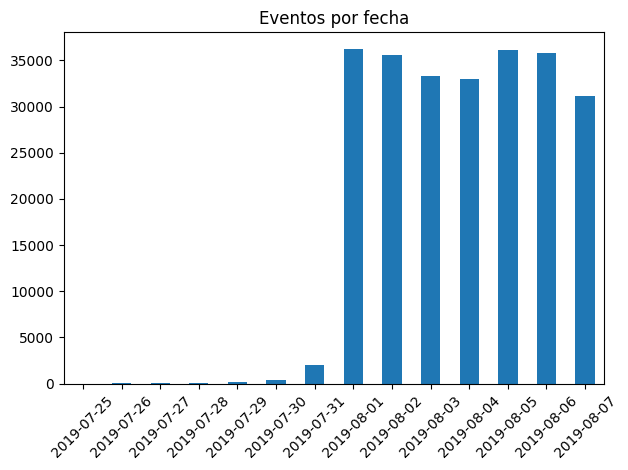

In [15]:
logs['event_date'].value_counts().sort_index().plot(kind='bar')
plt.title('Eventos por fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Del 25 al 30 de julio: Hay muy pocos eventos.

El 30 de julio sube un poco, pero aún parece un día parcial.

Desde el 1 al 5 de agosto: La cantidad de eventos es alta y constante, lo que indica que los datos están completos.

El 6 de agosto baja un poco, y el 7 prácticamente no hay datos

##### -  ¿Qué periodo representan realmente los datos?

In [17]:
daily_users = logs.groupby('event_date')['device_id_hash'].nunique()
cutoff = daily_users[daily_users > daily_users.quantile(0.05)].index.min()
print("Cut‑off:", cutoff)

Cut‑off: 2019-07-26


##### - ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [18]:
filtered = logs[logs['event_date'] >= cutoff]
print(f"Pérdida eventos: {(1-len(filtered)/len(logs)):.1%}")
print(f"Pérdida usuarios: {(1-filtered['device_id_hash'].nunique()/logs['device_id_hash'].nunique()):.1%}")

Pérdida eventos: 0.0%
Pérdida usuarios: 0.0%


##### - Asegúrate de tener usuarios de los tres grupos experimentales.

In [19]:
display(filtered['exp_id'].value_counts())

248    85743
246    80300
247    78074
Name: exp_id, dtype: int64

### Estudiar el embudo de eventos.

 * ***Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.***

In [20]:
top_events = filtered['event_name'].value_counts()
display(top_events.head(10))

MainScreenAppear           119201
OffersScreenAppear          46824
CartScreenAppear            42729
PaymentScreenSuccessful     34311
Tutorial                     1052
Name: event_name, dtype: int64

* ***Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.***

In [21]:
# Orden de eventos por numero de usuarios.
funnel = ["MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"]
funnel

['MainScreenAppear',
 'OffersScreenAppear',
 'CartScreenAppear',
 'PaymentScreenSuccessful']

In [22]:
# numero de Usurios por acción
users_evt = filtered.groupby('event_name')['device_id_hash'].nunique().loc[funnel]
display(users_evt)

event_name
MainScreenAppear           7439
OffersScreenAppear         4613
CartScreenAppear           3749
PaymentScreenSuccessful    3547
Name: device_id_hash, dtype: int64

In [23]:
# Proporción de usuarias que realizaron la acción.
logs['hizo_evento'] = logs['event_name'] == 'CartScreenAppear'
proporcion = logs.groupby('device_id_hash')['hizo_evento'].max().mean()
print(f"proporcion de usuarios que realizaron la ación", proporcion)

proporcion de usuarios que realizaron la ación 0.49649053105548935


* ***¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.***


Según la cantidad de usuarios únicos por evento, el orden más probable de las acciones es:

MainScreenAppear

OffersScreenAppear

CartScreenAppear

PaymentScreenSuccessful

Tutorial

No todas las acciones parecen formar parte de una sola secuencia. El evento Tutorial, por ejemplo, parece opcional y no obligatorio para todos. Además, es posible que algunos usuarios no completen todo el flujo.

* ***Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente.***

In [24]:
retention = users_evt / users_evt.shift(1)
retention.iloc[0] = 1.0
cum_conv = users_evt / users_evt.iloc[0]

funnel_df = pd.DataFrame({'usuarios':users_evt,
                          'retencion':retention,
                          'conv_acum':cum_conv})
display(funnel_df)

,usuarios,retencion,conv_acum
event_name,,,
MainScreenAppear,7439,1.000000,1.000000
OffersScreenAppear,4613,0.620110,0.620110
CartScreenAppear,3749,0.812703,0.503966
PaymentScreenSuccessful,3547,0.946119,0.476811


* ***¿En qué etapa pierdes más usuarios?***

In [25]:
print("Mayor drop entre:", retention[1:].idxmin())
print("Conversión total a pago:", f"{cum_conv.iloc[-1]:.2%}")

Mayor drop entre: OffersScreenAppear
Conversión total a pago: 47.68%


Sin tener en cuenta la etapa del tutorial dado que es una accion opcional, la etapa donde mas usuarios se pierden es en MainScreenAppear y OffersScreenAppear	

* ***¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?***

Solo el 47% de los usuaros realizan todo el viajes desde su primer evento hasta el pago

### Estudiar los resultados del experimento

* ***¿Cuántos usuarios hay en cada grupo?***

In [26]:
groups = [246, 247, 248]
print("Usuarios por grupo:")
for g in groups:
    print(f"{g}: {filtered[filtered['exp_id']==g]['device_id_hash'].nunique():,}")

events = filtered['event_name'].unique()

Usuarios por grupo:
246: 2,489
247: 2,520
248: 2,542


In [27]:
logs

,event_name,device_id_hash,eventtimestamp,exp_id,event_dt,event_date,hizo_evento
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,False
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,False
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,False
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,True
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,False
...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07,False
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07,False
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07,False
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07,False


In [28]:
def proportion_test(s1, t1, s2, t2):
    count = np.array([s1, s2])
    nobs = np.array([t1, t2])
    stat, pval = proportions_ztest(count, nobs)
    sig = pval < 0.05
    return sig, pval

In [29]:
aa = []
for ev in events:
    s1, t1 = (filtered[(filtered['exp_id']==246)&(filtered['event_name']==ev)]['device_id_hash'].nunique(),
              filtered[filtered['exp_id']==246]['device_id_hash'].nunique())
    s2, t2 = (filtered[(filtered['exp_id']==247)&(filtered['event_name']==ev)]['device_id_hash'].nunique(),
              filtered[filtered['exp_id']==247]['device_id_hash'].nunique())
    sig, p = proportion_test(s1,t1,s2,t2)
    aa.append((ev,p,sig))
aa_df = pd.DataFrame(aa, columns=['event_name','p','sig']).sort_values('p')
display(aa_df.head())

,event_name,p,sig
3,PaymentScreenSuccessful,0.109025,False
1,CartScreenAppear,0.198175,False
2,OffersScreenAppear,0.323323,False
0,MainScreenAppear,0.585664,False
4,Tutorial,0.875657,False


No hay diferencias estadísticamente significativas en la proporción de usuarios que realizaron estos eventos entre los grupos 246 y 247.

In [30]:
ctrl_users = filtered[filtered['exp_id'].isin([246,247])]['device_id_hash'].nunique()
test_results=[]
for ev in events:
    s_ctrl = filtered[(filtered['exp_id'].isin([246,247]))&(filtered['event_name']==ev)]['device_id_hash'].nunique()
    s_test,t_test = (filtered[(filtered['exp_id']==248)&(filtered['event_name']==ev)]['device_id_hash'].nunique(),
                     filtered[filtered['exp_id']==248]['device_id_hash'].nunique())
    sig,p = proportion_test(s_ctrl,ctrl_users,s_test,t_test)
    test_results.append((ev,p,sig))
test_df = pd.DataFrame(test_results, columns=['event_name','p','sig']).sort_values('p')
display(test_df.head())

,event_name,p,sig
1,CartScreenAppear,0.260981,False
2,OffersScreenAppear,0.455540,False
0,MainScreenAppear,0.506713,False
3,PaymentScreenSuccessful,0.657843,False
4,Tutorial,0.808687,False


No hay diferencias estadísticamente significativas en la proporción de usuarios que realizaron estos eventos entre los grupos 246, 247 y 248.

In [31]:
alpha=0.05
alpha_bonf = alpha/len(events)
sig_events = test_df[test_df['p']<alpha_bonf]
print("Nivel Bonferroni:", alpha_bonf)
print("Eventos con diferencia significativa (post‑Bonferroni):")
display(sig_events)

Nivel Bonferroni: 0.01
Eventos con diferencia significativa (post‑Bonferroni):


,event_name,p,sig


***Nivel de signicia:*** 0.05



* ***Calcula cuántas pruebas de hipótesis estadísticas has realizado.***

In [32]:
num_pruebas = len(events)
print(f"Cantidad de pruebas realizadas: {num_pruebas}")

Cantidad de pruebas realizadas: 5


 Estoy de acuerdo con usar un nivel de significancia de 0.05, porque es un estándar comúnmente aceptado en análisis estadístico. Esto significa que acepto un 5% de probabilidad de cometer un error tipo I, es decir, concluir que hay una diferencia cuando en realidad no la hay.

Este nivel me permite tener un buen equilibrio entre detectar efectos reales y evitar falsos positivos. Además, dado que estoy realizando varias pruebas de hipótesis, también aplico la corrección de Bonferroni para reducir aún más el riesgo de obtener resultados significativos solo por azar.

Por eso, considero que usar un alfa de 0.05 me da confianza para interpretar los resultados del experimento sin ser demasiado permisiva ni demasiado estricta.